In [25]:
#
# Working through the example at 
# https://github.com/kwmcbride/kipet_examples/blob/master/examples/example_1/Ex_1_ode_sim.py
#

In [26]:
from kipet import KipetModel

import matplotlib.pyplot as plt
import sys

In [27]:
kipet_model = KipetModel()

r1 = kipet_model.new_reaction('reaction-1')

# Add the model parameters
k1 = r1.parameter('k1', value = 2)
k2 = r1.parameter('k2', value = 0.2)

A = r1.component('A', value = 1.0)
B = r1.component('B', value = 0.0)
C = r1.component('C', value = 0.0)

In [28]:
rA = r1.add_expression('rA', k1*A)
rB = r1.add_expression('rB', k2*B)

r1.add_ode('A', -rA)
r1.add_ode('B', rA - rB)
r1.add_ode('C', rB)

In [29]:
# Create the model - simulations require times
r1.set_times(0, 10)

r1.settings.simulator.tee = True

In [30]:
r1.simulate()

Finished creating simulator
Ipopt 3.13.4: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3907
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1205
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only u

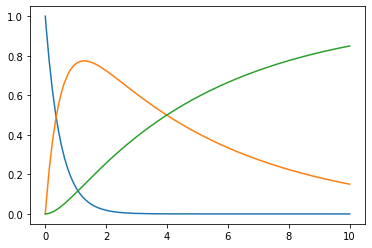

In [31]:
plt.plot(r1.results.Z)

In [35]:
r1.model.pprint()

18 Set Declarations
    Dose_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain               : Size : Members
        None :     2 : alltime*Dose_index_1 :    2 : {(0, 'd_var'), (10, 'd_var')}
    Dose_index_1 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 : {'d_var',}
    Y_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain            : Size : Members
        None :     2 : alltime*Y_index_1 :    4 : {(0, 'rA'), (0, 'rB'), (10, 'rA'), (10, 'rB')}
    Y_index_1 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'rA', 'rB'}
    Z_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain                     : Size : Members
        None :     2 : alltime*mixture_components :    6 : {(0, 'A'), (0, 'B'), (0, 'C'), (10, 'A'), (10, 'B'), (10, 'C')}
    algebraic_consts_index : Size=1, Ind